In [26]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skfuzzy.cluster import cmeans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [27]:
warnings.simplefilter("ignore")

In [28]:
url = "https://raw.githubusercontent.com/AndresBeta123/ProyectoDataMining-2023/main/title_complete_preprocesado.csv"
title_complete_preprocesado = pd.read_csv(url)

In [29]:
display(title_complete_preprocesado.head(10))

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,category 1,category 2,category 3
0,tt0000009,Miss Jerry,1894,0.000856,Romance,0.477778,0.000072,24.0,NaN,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,0.001925,"Documentary,News,Sport",0.477778,0.000170,5.0,14.0,21.0
2,tt0000502,Bohemios,1905,0.001925,NaN,0.344444,0.000004,20.0,NaN,NaN
3,tt0000574,The Story of the Kelly Gang,1906,0.001342,"Action,Adventure,Biography",0.555556,0.000301,11.0,17.0,26.0
4,tt0000591,The Prodigal Son,1907,0.001731,Drama,0.377778,0.000005,22.0,NaN,NaN
5,tt0000615,Robbery Under Arms,1907,0.001731,Drama,0.366667,0.000007,22.0,NaN,NaN
6,tt0000630,Hamlet,1908,0.001731,Drama,0.200000,0.000008,22.0,NaN,NaN
7,tt0000675,Don Quijote,1908,0.001731,Drama,0.355556,0.000005,22.0,NaN,NaN
8,tt0000679,The Fairylogue and Radio-Plays,1908,0.002314,"Adventure,Fantasy",0.455556,0.000023,11.0,12.0,NaN
9,tt0000862,Faldgruben,1909,0.001731,NaN,0.377778,0.000004,20.0,NaN,NaN


In [5]:
url = "https://raw.githubusercontent.com/AndresBeta123/ProyectoDataMining-2023/main/principals_complete_preprocesado.csv"
principals_complete_preprocesado = pd.read_csv(url)

# Asociacion

In [30]:
def generarMatrizDeAsociacion(data):
    all_items = set()
    for items_str in data:
        items_list = [item.strip() for item in items_str.split(',')]
        all_items.update(items_list)

    # Crear un diccionario para almacenar los datos
    data_dict = {}
    for item in all_items:
        data_dict[item] = []

    # Llenar el diccionario con los valores True/False
    for items_str in data:
        #data_dict['ID'].append(tid)
        items_list = [item.strip() for item in items_str.split(',')]
        for item in all_items:
            data_dict[item].append(item in items_list)

    # Crear un DataFrame a partir del diccionario
    return pd.DataFrame(data_dict)

In [31]:
def ReglasDeAsociacionApriori(df,support,confidence):
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='lift')
    rules = rules[rules['confidence'] >= confidence]
    rules = rules.sort_values(by=['confidence','support'],ascending = False)
    display(frequent_itemsets)
    display(rules)

In [32]:
def ReglasDeAsociacionfpgrowth(df,support,confidence):
    frequent_itemsets = fpgrowth(df, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='lift')
    rules = rules[rules['confidence'] >= confidence]
    rules = rules.sort_values(by=['confidence','support'],ascending = False)
    display(frequent_itemsets)
    display(rules)

In [33]:
data_generes_notNaN = title_complete_preprocesado['genres'].dropna()
data_generes_NaN = title_complete_preprocesado['genres'].fillna('sinGenero')

Matrix_generes_notNaN = generarMatrizDeAsociacion(data_generes_notNaN)
Matrix_generes_NaN = generarMatrizDeAsociacion(data_generes_NaN)

In [34]:
Matrix_generes_notNaN

,Western,History,Adult,Fantasy,Reality-TV,Horror,Family,Mystery,Animation,Music,...,Biography,Drama,Documentary,Crime,Adventure,Game-Show,Sci-Fi,Sport,News,Romance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335165,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
335166,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
335167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
335168,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [33]:
minSupport = 0.0001
minConfidence = 0.5

## Apriori

In [35]:
ReglasDeAsociacionApriori(Matrix_generes_notNaN,minSupport,minConfidence)

,support,itemsets
0,0.019333,(Animation)
1,0.030623,(Fantasy)
2,0.030608,(History)
3,0.059982,(Adventure)
4,0.023672,(Sci-Fi)
...,...,...
510,0.000119,"(War, Comedy, Romance)"
511,0.000188,"(Musical, Crime, Drama)"
512,0.002599,"(Crime, Romance, Drama)"
513,0.001498,"(Musical, Romance, Drama)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
377,"(History, News)",(Documentary),0.000531,0.179404,0.000531,1.000000,5.573997,0.000436,inf,0.821032
630,"(News, Biography)",(Documentary),0.000158,0.179404,0.000155,0.981132,5.468827,0.000127,43.491562,0.817275
65,(News),(Documentary),0.002062,0.179404,0.001969,0.955137,5.323933,0.001599,18.291339,0.813847
884,"(Western, Music)",(Drama),0.001378,0.452487,0.001298,0.941558,2.080853,0.000674,9.368559,0.520145
635,"(News, Drama)",(Documentary),0.000239,0.179404,0.000224,0.937500,5.225622,0.000181,13.129528,0.808828
956,"(Crime, Film-Noir)",(Drama),0.002094,0.452487,0.001808,0.863248,1.907786,0.000860,4.003690,0.476831
134,(Film-Noir),(Drama),0.002629,0.452487,0.002226,0.846765,1.871359,0.001036,3.573031,0.466856
992,"(Romance, War)",(Drama),0.001981,0.452487,0.001647,0.831325,1.837237,0.000751,3.245971,0.456609
716,"(Romance, Biography)",(Drama),0.000919,0.452487,0.000764,0.831169,1.836891,0.000348,3.242963,0.456021
958,"(Film-Noir, Drama)",(Crime),0.002226,0.087794,0.001808,0.812332,9.252683,0.001613,4.860753,0.893913


In [33]:
ReglasDeAsociacionApriori(Matrix_generes_NaN,minSupport,minConfidence)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(War),(Drama),0.019887,0.437372,0.012496,0.628335,1.436616,0.003798,1.513806,0.310086
32,(Romance),(Drama),0.105750,0.437372,0.061805,0.584445,1.336265,0.015553,1.353919,0.281404
41,(Crime),(Drama),0.084862,0.437372,0.046685,0.550126,1.257799,0.009568,1.250634,0.223966
47,(Film-Noir),(Drama),0.002541,0.437372,0.002151,0.846765,1.936030,0.001040,3.671670,0.484711
93,(Biography),(Documentary),0.033609,0.173412,0.016851,0.501373,2.891230,0.011022,1.657729,0.676876
96,(News),(Documentary),0.001993,0.173412,0.001903,0.955137,5.507921,0.001558,18.424922,0.820078
132,(Film-Noir),(Crime),0.002541,0.084862,0.002024,0.796822,9.389667,0.001809,4.504117,0.895776
169,"(Romance, War)",(Drama),0.001915,0.437372,0.001592,0.831325,1.900729,0.000754,3.335581,0.474795
178,"(War, Biography)",(Drama),0.000603,0.437372,0.000378,0.626794,1.433092,0.000114,1.507555,0.302391
182,"(Thriller, War)",(Drama),0.000574,0.437372,0.000311,0.542714,1.240852,0.000060,1.230363,0.194213


## FP-Growth

In [36]:
ReglasDeAsociacionfpgrowth(Matrix_generes_notNaN,minSupport,minConfidence)

,support,itemsets
0,0.109404,(Romance)
1,0.179404,(Documentary)
2,0.012901,(Sport)
3,0.002062,(News)
4,0.096861,(Action)
...,...,...
510,0.000164,"(Comedy, Drama, Adult)"
511,0.000125,"(Comedy, Fantasy, Adult)"
512,0.000185,"(Romance, Drama, Adult)"
513,0.000146,"(Crime, Drama, Adult)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,"(History, News)",(Documentary),0.000531,0.179404,0.000531,1.000000,5.573997,0.000436,inf,0.821032
92,"(News, Biography)",(Documentary),0.000158,0.179404,0.000155,0.981132,5.468827,0.000127,43.491562,0.817275
75,(News),(Documentary),0.002062,0.179404,0.001969,0.955137,5.323933,0.001599,18.291339,0.813847
614,"(Western, Music)",(Drama),0.001378,0.452487,0.001298,0.941558,2.080853,0.000674,9.368559,0.520145
81,"(News, Drama)",(Documentary),0.000239,0.179404,0.000224,0.937500,5.225622,0.000181,13.129528,0.808828
972,"(Crime, Film-Noir)",(Drama),0.002094,0.452487,0.001808,0.863248,1.907786,0.000860,4.003690,0.476831
964,(Film-Noir),(Drama),0.002629,0.452487,0.002226,0.846765,1.871359,0.001036,3.573031,0.466856
314,"(Romance, War)",(Drama),0.001981,0.452487,0.001647,0.831325,1.837237,0.000751,3.245971,0.456609
174,"(Romance, Biography)",(Drama),0.000919,0.452487,0.000764,0.831169,1.836891,0.000348,3.242963,0.456021
974,"(Film-Noir, Drama)",(Crime),0.002226,0.087794,0.001808,0.812332,9.252683,0.001613,4.860753,0.893913


In [35]:
ReglasDeAsociacionfpgrowth(Matrix_generes_NaN,minSupport,minConfidence)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Romance),(Drama),0.105750,0.437372,0.061805,0.584445,1.336265,0.015553,1.353919,0.281404
32,"(Romance, Sport)",(Drama),0.000784,0.437372,0.000456,0.580882,1.328120,0.000113,1.342411,0.247250
52,"(Sport, Crime)",(Drama),0.000234,0.437372,0.000144,0.617284,1.411348,0.000042,1.470093,0.291526
61,"(Sport, Biography)",(Documentary),0.001517,0.173412,0.000865,0.570342,3.288950,0.000602,1.923830,0.697009
67,"(Sport, History)",(Documentary),0.000355,0.173412,0.000262,0.739837,4.266366,0.000201,3.177199,0.765880
73,"(Sport, Adventure)",(Documentary),0.000326,0.173412,0.000205,0.628319,3.623278,0.000148,2.223916,0.724243
76,(News),(Documentary),0.001993,0.173412,0.001903,0.955137,5.507921,0.001558,18.424922,0.820078
82,"(Drama, News)",(Documentary),0.000231,0.173412,0.000216,0.937500,5.406212,0.000176,13.225414,0.815216
87,"(News, History)",(Documentary),0.000513,0.173412,0.000513,1.000000,5.766626,0.000424,inf,0.827013
93,"(News, Biography)",(Documentary),0.000153,0.173412,0.000150,0.981132,5.657822,0.000123,43.809184,0.823379


# Clustering

In [5]:
import sklearn.cluster as sk
import sklearn.metrics as skm

In [13]:
def plotPoints(dataset,k):
    data_clustered =  sk.KMeans(n_clusters=k, random_state=0,verbose = 0).fit(dataset)
    all_preds = data_clustered.inertia_
    all_clusters = data_clustered.cluster_centers_
    display(all_preds)
    display(all_clusters)
    plt.figure(figsize=(6,6))
    plt.scatter(np.array(dataset)[:,0],np.array(dataset)[:,1],c='b')
    plt.scatter(all_clusters[:,0],all_clusters[:,1],c="r")

In [6]:
def MedidasDeDistancia(data_for_clustering,k):
    data_clustered =  sk.KMeans(n_clusters=k, random_state=0,verbose = 0).fit(data_for_clustering)
    all_preds = data_clustered.inertia_
    all_clusters = data_clustered.cluster_centers_
    labels = data_clustered.labels_
    ssb = 0
    for j in range(k):
        cluster_data = data_for_clustering[labels == j]
        centroid = all_clusters[j]
        ssb += len(cluster_data) * np.sum((centroid - np.mean(data_for_clustering, axis=0)) ** 2)
    ssw = data_clustered.inertia_
    silhouette = skm.silhouette_score(data_for_clustering, data_clustered.labels_)
    dbi_score = skm.davies_bouldin_score(data_for_clustering,data_clustered.labels_)
    return ssb,ssw,silhouette,dbi_score

In [7]:
def plot_Codo(data,k):
    K = range(2,k)
    X = np.array(data)

    Sum_of_squared_distances = []
    Sum_of_squared_Between = []
    SilhouetteS = []
    Dbis = []
    data = data.dropna()

    for i in K:
        ssb,ssw,silhouette,dbi_score =  MedidasDeDistancia(data,i)
        Sum_of_squared_distances.append(ssw)
        Sum_of_squared_Between.append(ssb)
        SilhouetteS.append(silhouette)
        Dbis.append(dbi_score)
    plt.plot(K, Sum_of_squared_distances, 'bx-',label = 'SSW')
    plt.xlabel('k')
    plt.ylabel('SSW')
    plt.show()
    plt.plot(K, Sum_of_squared_Between, 'ro-',label = 'SSB')
    plt.xlabel('k')
    plt.ylabel('SSB')
    plt.show()
    plt.plot(K, SilhouetteS, 'bo-',label = 'silhouette')
    plt.xlabel('k')
    plt.ylabel('silhouette')
    plt.show()
    plt.plot(K, Dbis, 'rx-',label = 'dbi_score')
    plt.xlabel('k')
    plt.ylabel('dbi_score')
    plt.show()

In [9]:
def fuzzy_clustering_analysis(data, k, fuzziness_values):
    metrics = []  # Matriz para almacenar los resultados

    best_silhouette = -1
    best_config = {'n_clusters': None, 'fuzziness': None}

    for fuzziness in fuzziness_values:
        metric_fuzziness = []  # Almacena los resultados de una iteración para un valor de fuzziness

        for n_clusters in range(2, k+1):
            centers, u, _, _, _, _, _ = cmeans(data.T, n_clusters, fuzziness, error=0.00, maxiter=1000)
            datosFMC = pd.DataFrame(u.T)
            centroides = centers
            matriz_pertenencia = datosFMC.values

            SSW = 0
            for i in range(n_clusters):
                for j in range(len(data)):
                    SSW += sum(matriz_pertenencia[j, i] * fuzziness * skm.pairwise.euclidean_distances([centroides[i]], [data.iloc[j]])[0] * 2)

            SSB = 0
            for i in range(n_clusters):
                SSB += sum(matriz_pertenencia[:, i] * fuzziness *  skm.pairwise.euclidean_distances([centroides[i]], [centroides.mean(axis=0)])[0] * 2)

            labels = np.argmax(u, axis=0)
            dbi_score = skm.davies_bouldin_score(data, labels)
            silhouette_avg = skm.silhouette_score(data, labels)

            # Almacena los resultados en la matriz para este valor de fuzziness
            metric_fuzziness.append([SSB, SSW, silhouette_avg, dbi_score])

            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_config['n_clusters'] = n_clusters
                best_config['fuzziness'] = fuzziness

        metrics.append(metric_fuzziness)  # Agrega los resultados de un valor de fuzziness a la matriz de resultados

    print("\nMejor configuración encontrada:")
    print(f"n_clusters={best_config['n_clusters']}, fuzziness={best_config['fuzziness']}")

    # Graficar los resultados
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.flatten()
    metric_names = ['SSB', 'SSW', 'Silhouette', 'Dbi']

    for i, ax in enumerate(axs):
        for idx, metric_fuzziness in enumerate(metrics):
            values = [x[i] for x in metric_fuzziness]
            ax.plot(range(2, k+1), values, marker='o', label=f"Fuzziness {fuzziness_values[idx]}")

        ax.set_xlabel('k')
        ax.set_ylabel(metric_names[i])
        ax.legend()

    plt.tight_layout()
    plt.show()

In [10]:
def hierarchical_clustering_analysis(data, k):

    SilhouetteS = []
    Dbis = []

    best_silhouette = -1
    best_config = {'n_clusters': None}

    for n_clusters in range(2, k+1):
        clustering = sk.AgglomerativeClustering(n_clusters=n_clusters)
        labels = clustering.fit_predict(data)

        dbi_score = skm.davies_bouldin_score(data, labels)
        silhouette_avg = skm.silhouette_score(data, labels)


        SilhouetteS.append(silhouette_avg)
        Dbis.append(dbi_score)

        print(f"Configuración: n_clusters={n_clusters}")
        print("Índice de Davies-Bouldin (DBI):", dbi_score)
        print("Coeficiente de Silueta:", silhouette_avg)
        print("-------------------------------")

        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_config['n_clusters'] = n_clusters


    plt.plot(range(2, k+1), SilhouetteS, 'bo-', label='Silhouette')
    plt.xlabel('k')
    plt.ylabel('Silhouette')
    plt.show()

    plt.plot(range(2, k+1), Dbis, 'rx-', label='Dbi')
    plt.xlabel('k')
    plt.ylabel('dbi')
    plt.show()

    print("\nMejor configuración encontrada:")
    print(f"n_clusters={best_config['n_clusters']}")

In [22]:
title_complete_fracmented = title_complete_preprocesado.sample(frac=0.1)
dimensiones = ['runtimeMinutes','averageRating','numVotes']
data_for_clustering = title_complete_fracmented[dimensiones].copy()


### Kmeans

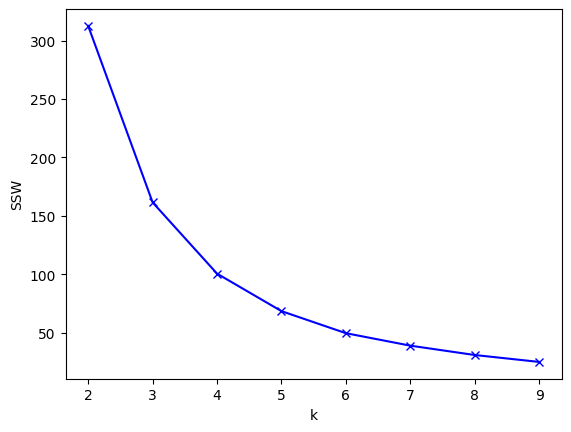

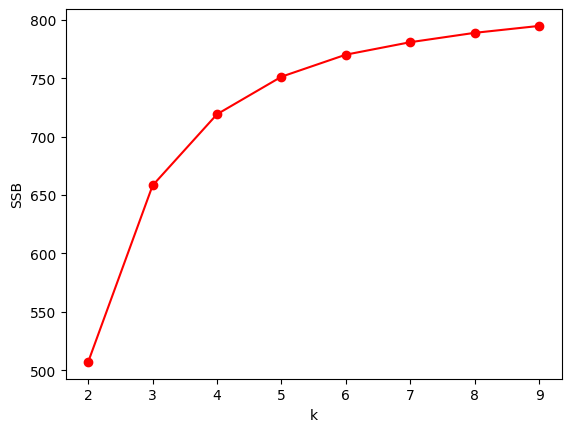

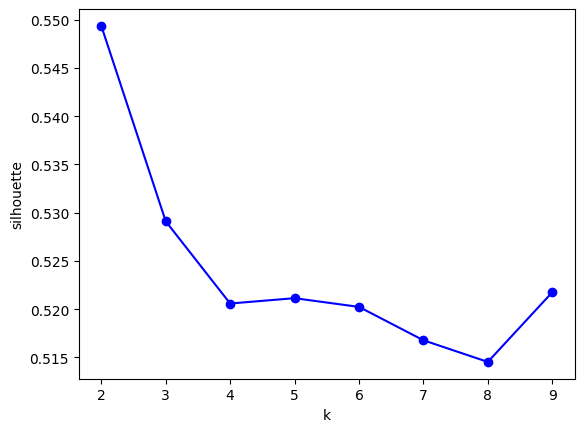

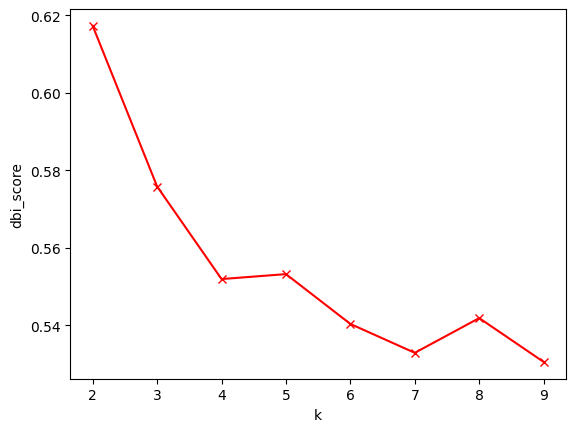

In [36]:
plot_Codo(data_for_clustering,10)

### Fuzzy


Mejor configuración encontrada:
n_clusters=2, fuzziness=1.5


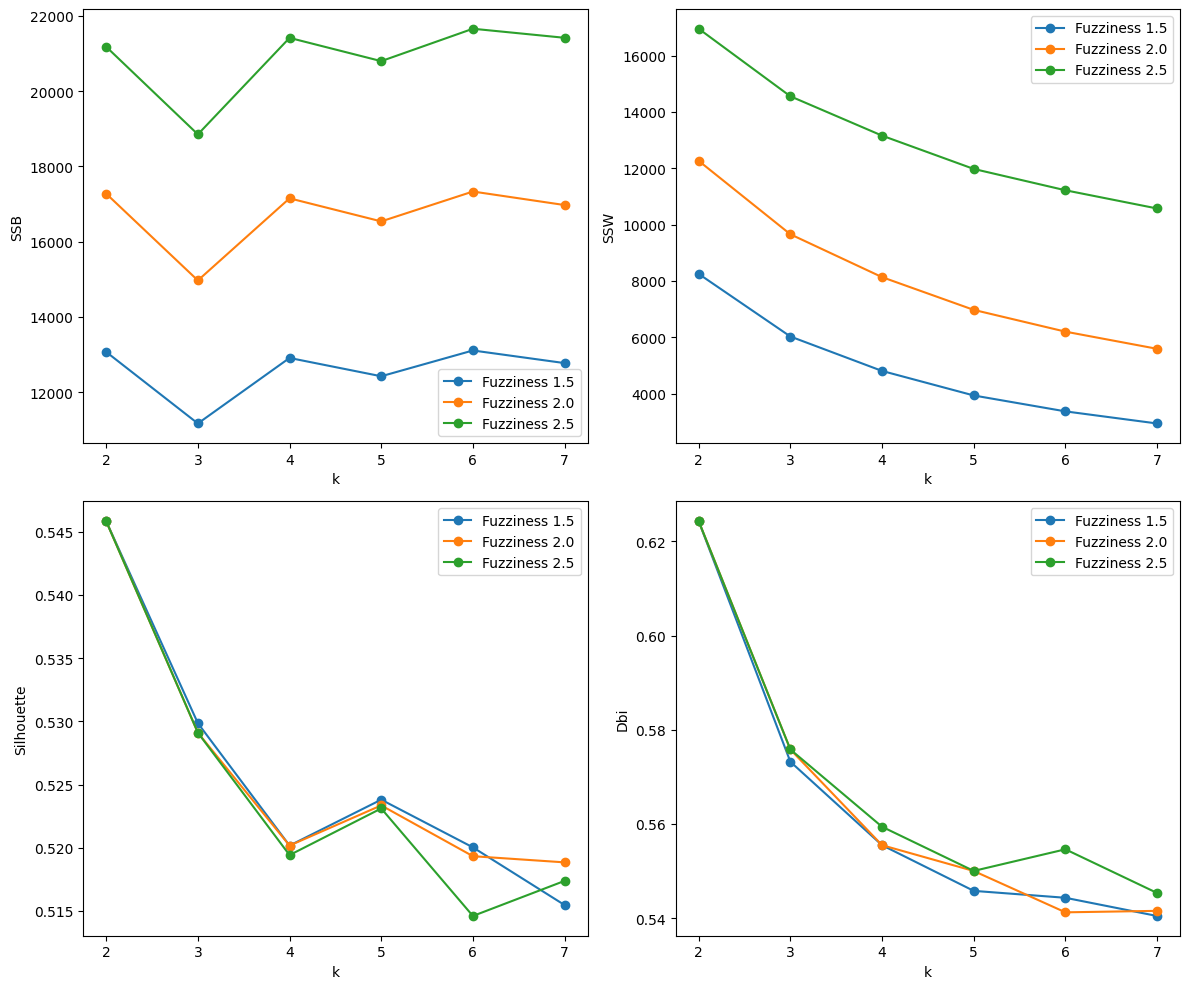

In [37]:
k_clusters = 7  # Valor máximo para el número de clusters
fuzziness_values = [1.5, 2.0 , 2.5]  # Valores de fuzziness a probar
fuzzy_clustering_analysis(data_for_clustering, k_clusters, fuzziness_values)

### Hierarchical clustering

Configuración: n_clusters=2
Índice de Davies-Bouldin (DBI): 0.6340489163408635
Coeficiente de Silueta: 0.53552707348188
-------------------------------
Configuración: n_clusters=3
Índice de Davies-Bouldin (DBI): 0.5724958150741398
Coeficiente de Silueta: 0.5045049016684059
-------------------------------
Configuración: n_clusters=4
Índice de Davies-Bouldin (DBI): 0.5621623510728353
Coeficiente de Silueta: 0.5032965294756392
-------------------------------
Configuración: n_clusters=5
Índice de Davies-Bouldin (DBI): 0.5789541049866405
Coeficiente de Silueta: 0.488799479210591
-------------------------------
Configuración: n_clusters=6
Índice de Davies-Bouldin (DBI): 0.5677058979846884
Coeficiente de Silueta: 0.47594458258010747
-------------------------------


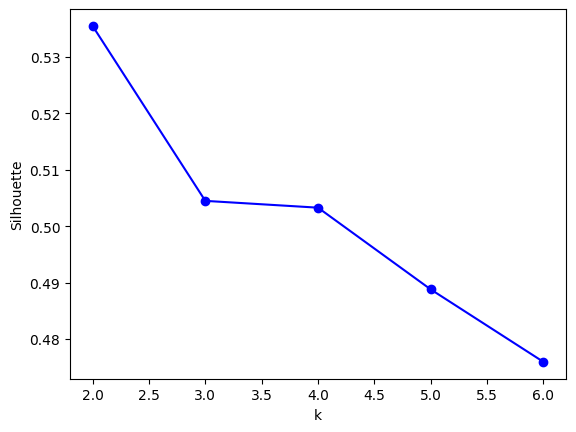

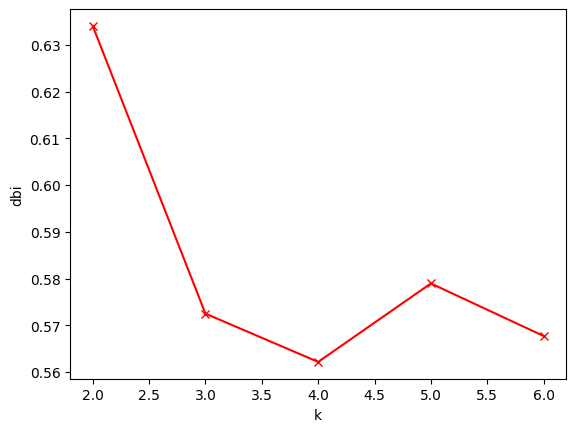


Mejor configuración encontrada:
n_clusters=2


In [38]:
k_clusters = 6  # Valor máximo para el número de clusters
hierarchical_clustering_analysis(data_for_clustering, k_clusters)